<a href="https://colab.research.google.com/github/mukul-mschauhan/textanalytics/blob/master/NLP_GA__Model_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NLP GA Model set
### Total Marks 40
### Note:  This is  Model GA paper is for learners reference.  The Question type,  topics, order, marking and specification may diifer in actual  GA exam.

In [1]:
from six import string_types
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
import nltk
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

lancaster=LancasterStemmer()
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

import requests
from bs4 import BeautifulSoup
import pandas as pd
lmtzr = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Question  1. ( Marks 5)
### 1.What is a Document Term Matrix (CountVectorizer)? Explain with an example.Write a drawbacks of Document Term Matrix?(Marks 1 + 2 + 1)

### Why do we need this?

* It converts the text into numerical representations.

* we need this because most of the ML models prefer data in the form of numbers. So, my X and y should be in the form of numbers.

* What if the sentiment is "Positive", "Negative" or "neutral"...I need to convert this into 1, -1 or 0 for the model to understand the target and build predictions

* That converts the text into a **Sparse Matrix** (One Hot Encoding).
* The text is splitted into tokens and then each token is taken into consideration to convert them into **identity matrix**.

### An example of Count Vectorizer

text = ["The", "cat", "sits", "on", "the", "mat"]

from sklearn.feature_extraction.text import CountVectorizer

cv =CountVectorizer(min_df = 5,stop_words = True)

cv.fit_transform(text)

Note: It will generate the Sparse Matrix consisting of all the words except Stop Words...

#### Disadvantages

* Lack of Semantic Understanding
* Large Vocab Size
* Irrevalant Words Infusion..
* **Words dont have any weights**
* Smaller Dataset.
* Difficult to train the Model and model will suffer from **Curse of Dimensions**
* Word Order is missing or does not account for the sequence of Words.



In [6]:
text = ["The", "cat", "sits", "on", "the", "mat"]

from sklearn.feature_extraction.text import CountVectorizer

cv =CountVectorizer(stop_words= "english")

cv.fit_transform(text).toarray()

array([[0, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0]])

## Question 2.  (Marks : 10)
### Use the data_set.csv data. The dataset contains review of a product from an online-shopping platform. Consider the data and perform the following tasks

In [7]:
data = pd.read_csv('data_set.csv')
data.head()

,review_text
0,This is my 1st ever Echo 🥺 I'm amazed by its c...
1,"Excellent product, super quality. It capable t..."
2,So it is my first Echo Dot.It definitely looks...
3,I was expecting more as it's 4th gen... But di...
4,Love the new revamped version of Alexa. All y...


## 2.1  Clean and Pre-process the data.  

Steps:
- Tokenize
- Case conversion to Lower Case
- Removing Punctuation & Stopwords
- Stemming & Lemmatization


In [22]:
 import string
 noise = string.punctuation

 # Lower the Case & Punctuation Removal
 def clean_text(text):
  text = text.lower() # Converting the text into the Lower Case
  words = text.split()
  cleansed = [word for word in words if word not in noise]
  return " ".join(cleansed)

In [23]:
data["new_text"] = data.review_text.apply(clean_text)

In [24]:
# Stopwords

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

def remove_stopwords(text):
  words = text.split()
  cleansed = [word for word in words if word not in stop_words]
  return " ".join(cleansed)

data["new_text"] = data.new_text.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
nltk.download("wordnet")

lemma = WordNetLemmatizer()

def lemmatize(text):
  tokens = nltk.word_tokenize(text)
  lemmatized = [lemma.lemmatize(token) for token in tokens]
  return " ".join(lemmatized)

data["new_text_lemma"] = data.new_text.apply(lemmatize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
# Clean the Data end to end...

# Find th hyperlinks in the text
import re
def find_links(text):
  pattern = "[https?://S+|www\.\S+]"
  weblinks = re.findall(pattern, text)
  return weblinks

In [33]:
# Emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(
        r'('
        r'[\U0001F600-\U0001F64F]'  # emoticons
        r'|[\U0001F300-\U0001F5FF]'  # symbols & pictographs
        r'|[\U0001F680-\U0001F6FF]'  # transport & map symbols
        r'|[\U0001F1E0-\U0001F1FF]'  # flags (iOS)
        r'|[\U00002500-\U00002BEF]'  # chinese char
        r'|[\U00002702-\U000027B0]'
        r'|[\U00002702-\U000027B0]'
        r'|[\U000024C2-\U0001F251]'
        r'|[\U0001f926-\U0001f937]'
        r'|[\U00010000-\U0010ffff]'
        r'|[\u2640-\u2642]'
        r'|[\u2600-\u2B55]'
        r'|[\u200d]'
        r'|[\u23cf]'
        r'|[\u23e9]'
        r'|[\u231a]'
        r'|[\ufe0f]'                # dingbats
        r'|[\u3030]'
        r')', flags=re.UNICODE)
    return emoticon_pattern.sub(r'', text)

In [36]:
data["new_text"] = data.new_text.apply(remove_emoticons)
data["new_text_lemma"] = data.new_text_lemma.apply(remove_emoticons)

In [40]:
data["new_text_lemma"] = data.new_text_lemma.apply(clean_text)
#data.head()

## Question : 3 (Marks  15)

### 3.1 On the cleaned text data, perform a Sentiment analysis to understand the emotion of the individual reviews as well as the  overall review. (using textblob)

Steps:
- Assign the subjetivity response to the content
- Assign the polarity response to the content
- Assign sentiment to the content
- Visualize the frequency distribution of the sentiment on each content


In [46]:
#!pip install textblob
from textblob import TextBlob

def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  return sentiment

  # get sentiment subectivity
def get_subjectivity(text):
  blob = TextBlob(text)
  sub = blob.sentiment.subjectivity
  return sub

In [48]:
# Assign the subjetivity response to the content
data["subjectivity"] = data["new_text_lemma"].apply(get_subjectivity)

In [51]:
# Assign the polarity response to the content
data["polarity"] = data["new_text_lemma"].apply(get_sentiment)

In [53]:
# Assing sentiment to the content using polity
data.polarity.describe()

# Positive Sentiment (1) for polarity > 0
# Negative Sentiment (-1) for polarity < 0
# Neutral Sentiment (0) for polarity  = 0

def get_sentiment(score):
  if score > 0:
    return 1
  elif score < 0:
    return -1
  else:
    return 0

data["target"] = data.polarity.apply(get_sentiment)

<Axes: xlabel='target'>

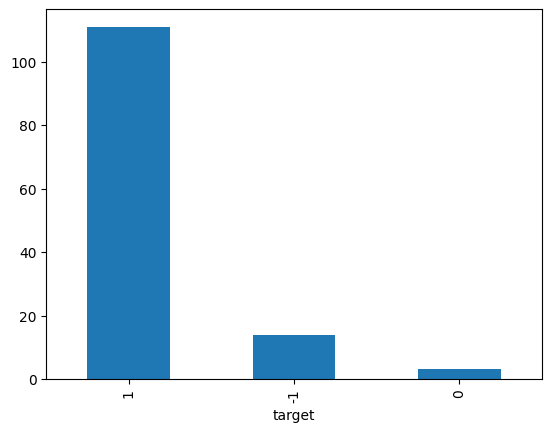

In [57]:
# Visualize the frequency distribution of the sentiment on each content
data.target.value_counts().plot(kind = "bar")

## Question 4.  (Marks 10)
## Find the TF-IDF   values of the words 'smart' and 'clear' in the first record  of the given dataset  

In [60]:
#vectorizer = TfidfVectorizer()


In [70]:
 # Pull the tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(pd.Series(data.new_text_lemma[0]))

# Feature Names
names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X.toarray(), columns = names)


In [76]:
print("smart" in tfidf_df.columns)
print("clear" in tfidf_df.columns)

# What is the tf-idf value???
# Since we know that smart exists in the data where as clear does not exist in the data
# Having said that, the frequency for clear will be 0
# Thus, while calculaing the tf*idf, anything multiplied by 0 will return 0
# Thus, the tf-df value for Smart and clear would be 0.


True
False
